In [1111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1112]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1113]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313814 entries, 0 to 1313813
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1313814 non-null  int64  
 1   kWh       1313814 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.0 MB


In [1114]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1313809    0.11
1313810    0.15
1313811    0.15
1313812    0.15
1313813    0.15
Name: kWh, Length: 1313814, dtype: float64

In [1115]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1313809    0.11
1313810    0.15
1313811    0.15
1313812    0.15
1313813    0.15
Name: kWh, Length: 1313814, dtype: float64

In [1116]:
l=len(conso_data)-1
l

1313813

In [1117]:
conso_data['sec']=conso_data['Interval']/1000


In [1118]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1119]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1120]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313814 entries, 0 to 1313813
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1313814 non-null  int64  
 1   kWh        1313814 non-null  float64
 2   sec        1313814 non-null  float64
 3   Wh         1313814 non-null  float64
 4   cumul(ms)  1313814 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 50.1 MB


In [1121]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1313809,31952,0.11,31.952,112.669004,30978661217
1313810,24087,0.15,24.087,149.458214,30978685304
1313811,24323,0.15,24.323,148.008058,30978709627
1313812,24180,0.15,24.180,148.883375,30978733807
1313813,24319,0.15,24.319,148.032403,30978758126


In [1122]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

30978758126000

In [1123]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 13, 24, 313258)

In [1124]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1125]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1126]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1127]:
conso_data['dates']

0         2023-08-21 19:13:46.247258
1         2023-08-21 19:14:08.105258
2         2023-08-21 19:14:30.106258
3         2023-08-21 19:14:52.034258
4         2023-08-21 19:15:13.925258
                     ...            
1313809   2024-08-14 08:24:25.530258
1313810   2024-08-14 08:24:49.617258
1313811   2024-08-14 08:25:13.940258
1313812   2024-08-14 08:25:38.120258
1313813   2024-08-14 08:26:02.439258
Name: dates, Length: 1313814, dtype: datetime64[ns]

In [1128]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:13:46.247258,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:14:08.105258,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:14:30.106258,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:14:52.034258,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:13.925258,21/08/23
...,...,...,...,...,...,...,...
1313809,31952,0.11,31.952,112.669004,30978661217,2024-08-14 08:24:25.530258,14/08/24
1313810,24087,0.15,24.087,149.458214,30978685304,2024-08-14 08:24:49.617258,14/08/24
1313811,24323,0.15,24.323,148.008058,30978709627,2024-08-14 08:25:13.940258,14/08/24
1313812,24180,0.15,24.180,148.883375,30978733807,2024-08-14 08:25:38.120258,14/08/24


In [1129]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('14/08/24', 14, 8, 2024)

In [1130]:
here = now.strftime('%H:%M:%S')
here

'08:26:31'

In [1131]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1132]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1312721 to 1313813
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1093 non-null   int64         
 1   kWh        1093 non-null   float64       
 2   sec        1093 non-null   float64       
 3   Wh         1093 non-null   float64       
 4   cumul(ms)  1093 non-null   int64         
 5   dates      1093 non-null   datetime64[ns]
 6   days       1093 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 68.3+ KB


In [1133]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1134]:
data = list(df_grp['kWh'])
print(data)


[0.819, 3.7, 4.23, 3.674, 4.19, 4.602, 3.529, 3.417, 3.513, 3.69, 3.756, 3.812, 4.249, 3.792, 3.485, 3.636, 3.319, 3.383, 4.278, 4.009, 4.043, 3.931, 3.447, 4.444, 3.755, 3.76, 4.331, 4.703, 3.818, 3.224, 3.179, 3.989, 3.682, 3.157, 3.802, 4.129, 3.766, 3.578, 4.771, 4.195, 4.54, 3.775, 3.409, 4.304, 3.88, 3.857, 3.441, 4.08, 3.656, 3.4, 4.135, 3.385, 3.884, 3.834, 3.637, 3.76, 4.246, 3.299, 3.874, 2.987, 2.055, 2.041, 2.447, 4.089, 3.72, 4.332, 3.611, 3.926, 3.742, 3.905, 4.002, 4.105, 3.655, 3.155, 3.805, 3.509, 3.625, 3.709, 3.684, 3.242, 3.877, 3.235, 3.796, 3.611, 4.078, 3.564, 3.386, 3.818, 4.065, 4.328, 4.136, 3.998, 4.234, 3.742, 3.929, 3.861, 3.915, 3.738, 4.049, 4.346, 3.885, 3.505, 3.683, 3.667, 3.349, 3.847, 3.998, 4.101, 3.476, 4.175, 3.605, 4.063, 4.544, 3.679, 3.435, 3.579, 4.155, 3.702, 4.087, 3.98, 3.746, 3.591, 5.126, 3.702, 3.765, 4.288, 4.106, 4.7, 4.407, 3.993, 3.768, 4.359, 4.686, 4.195, 4.792, 4.315, 3.731, 4.171, 3.702, 3.651, 3.531, 3.936, 3.681, 3.785, 3.58, 3

In [1135]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1136]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1137]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [1138]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306027
dtype: float64

In [1139]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.649483
dtype: float64

In [1140]:
last=df_grp.iloc[-1]['kWh']
last

1.093

In [1141]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1312721 to 1313813
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1093 non-null   int64         
 1   kWh        1093 non-null   float64       
 2   sec        1093 non-null   float64       
 3   Wh         1093 non-null   float64       
 4   cumul(ms)  1093 non-null   int64         
 5   dates      1093 non-null   datetime64[ns]
 6   days       1093 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 68.3+ KB


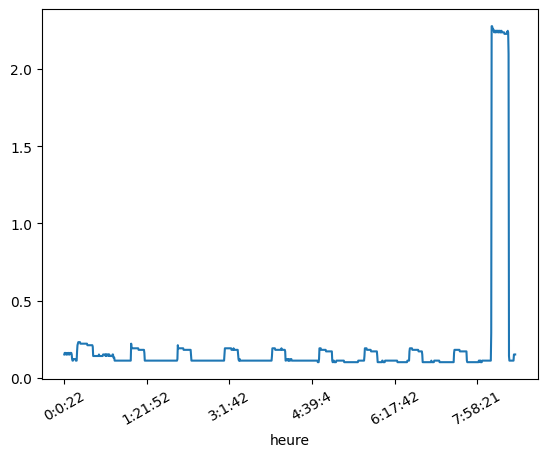

In [1142]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [1143]:
conso_day['heure']


1312721     0:0:22
1312722     0:0:44
1312723      0:1:6
1312724     0:1:28
1312725     0:1:52
            ...   
1313809    8:24:25
1313810    8:24:49
1313811    8:25:13
1313812    8:25:38
1313813     8:26:2
Name: heure, Length: 1093, dtype: object

In [1144]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:22',
              days   kWh
  heure                 
  0:0:22  14/08/24  0.15),
 ('0:0:44',
              days   kWh
  heure                 
  0:0:44  14/08/24  0.16),
 ('0:1:6',
             days   kWh
  heure                
  0:1:6  14/08/24  0.16),
 ('0:1:28',
              days   kWh
  heure                 
  0:1:28  14/08/24  0.16),
 ('0:1:52',
              days   kWh
  heure                 
  0:1:52  14/08/24  0.15),
 ('0:2:15',
              days   kWh
  heure                 
  0:2:15  14/08/24  0.16),
 ('0:2:38',
              days   kWh
  heure                 
  0:2:38  14/08/24  0.15),
 ('0:3:2',
             days   kWh
  heure                
  0:3:2  14/08/24  0.15),
 ('0:3:25',
              days   kWh
  heure                 
  0:3:25  14/08/24  0.15),
 ('0:3:48',
              days   kWh
  heure                 
  0:3:48  14/08/24  0.16),
 ('0:4:11',
              days   kWh
  heure                 
  0:4:11  14/08/24  0.16),
 ('0:4:35',
              day

In [1145]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:22',
  heure
  0:0:22    0.15
  Name: kWh, dtype: float64),
 ('0:0:44',
  heure
  0:0:44    0.16
  Name: kWh, dtype: float64),
 ('0:1:6',
  heure
  0:1:6    0.16
  Name: kWh, dtype: float64),
 ('0:1:28',
  heure
  0:1:28    0.16
  Name: kWh, dtype: float64),
 ('0:1:52',
  heure
  0:1:52    0.15
  Name: kWh, dtype: float64),
 ('0:2:15',
  heure
  0:2:15    0.16
  Name: kWh, dtype: float64),
 ('0:2:38',
  heure
  0:2:38    0.15
  Name: kWh, dtype: float64),
 ('0:3:2',
  heure
  0:3:2    0.15
  Name: kWh, dtype: float64),
 ('0:3:25',
  heure
  0:3:25    0.15
  Name: kWh, dtype: float64),
 ('0:3:48',
  heure
  0:3:48    0.16
  Name: kWh, dtype: float64),
 ('0:4:11',
  heure
  0:4:11    0.16
  Name: kWh, dtype: float64),
 ('0:4:35',
  heure
  0:4:35    0.15
  Name: kWh, dtype: float64),
 ('0:4:57',
  heure
  0:4:57    0.16
  Name: kWh, dtype: float64),
 ('0:5:21',
  heure
  0:5:21    0.15
  Name: kWh, dtype: float64),
 ('0:5:44',
  heure
  0:5:44    0.16
  Name: kWh, dtype: float64),

In [1146]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:22,23653,0.15,23.653,152.200567,30948417924,2024-08-14 00:00:22.237258,14/08/24
0:0:44,22053,0.16,22.053,163.243096,30948439977,2024-08-14 00:00:44.290258,14/08/24
0:1:6,22129,0.16,22.129,162.682453,30948462106,2024-08-14 00:01:06.419258,14/08/24
0:1:28,22533,0.16,22.533,159.765677,30948484639,2024-08-14 00:01:28.952258,14/08/24
0:1:52,23313,0.15,23.313,154.420281,30948507952,2024-08-14 00:01:52.265258,14/08/24
...,...,...,...,...,...,...,...
8:24:25,31952,0.11,31.952,112.669004,30978661217,2024-08-14 08:24:25.530258,14/08/24
8:24:49,24087,0.15,24.087,149.458214,30978685304,2024-08-14 08:24:49.617258,14/08/24
8:25:13,24323,0.15,24.323,148.008058,30978709627,2024-08-14 08:25:13.940258,14/08/24


In [1147]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [1148]:
df.iloc[0].dates

Timestamp('2024-08-14 00:00:22.237258')

In [1149]:
df.dates.dt.time

heure
0:0:22     00:00:22.237258
0:0:44     00:00:44.290258
0:1:6      00:01:06.419258
0:1:28     00:01:28.952258
0:1:52     00:01:52.265258
                ...       
8:24:25    08:24:25.530258
8:24:49    08:24:49.617258
8:25:13    08:25:13.940258
8:25:38    08:25:38.120258
8:26:2     08:26:02.439258
Name: dates, Length: 1093, dtype: object

In [1150]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1151]:
tranches = len(df)//1000
tranches+1

2

In [1152]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-14 00:00:22.237258	2024-08-14 07:57:45.902258	7h 57m 23s 	1000
2024-08-14 07:57:45.902258	2024-08-14 08:26:02.439258	0h 28m 16s 	93


In [1153]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('08:26:31', 1.093, 1093)

In [1154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0:0:22 to 8:26:2
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1093 non-null   int64         
 1   kWh        1093 non-null   float64       
 2   sec        1093 non-null   float64       
 3   Wh         1093 non-null   float64       
 4   cumul(ms)  1093 non-null   int64         
 5   dates      1093 non-null   datetime64[ns]
 6   days       1093 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 100.6+ KB


In [1155]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [1156]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 21/08/23 to 14/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     360 non-null    float64
dtypes: float64(1)
memory usage: 5.6+ KB


In [1157]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [1158]:
df_grp.tail(7)

,kWh
days,
08/08/24,3.615
09/08/24,3.616
10/08/24,4.042
11/08/24,3.700
12/08/24,4.370
13/08/24,4.362
14/08/24,1.093


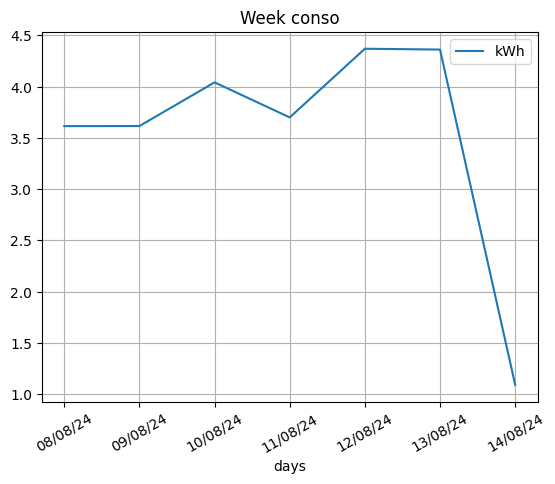

In [1159]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [1160]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [1161]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


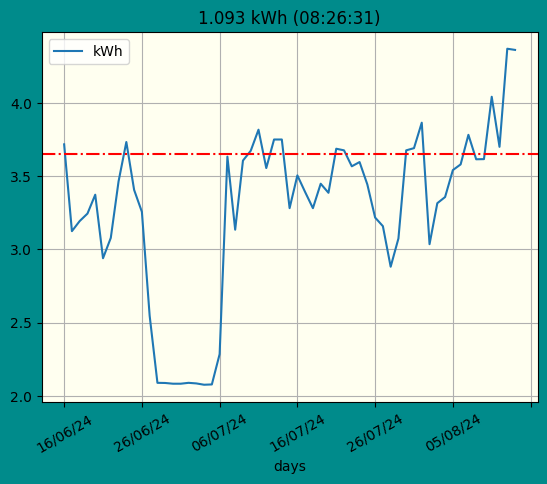

In [1162]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [1163]:
df_grp.mean()

kWh    3.649483
dtype: float64

In [1164]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
01/08/24,3.865
02/08/24,3.035
03/08/24,3.315
04/08/24,3.357
05/08/24,3.541
06/08/24,3.580
07/08/24,3.782
08/08/24,3.615
09/08/24,3.616


In [1165]:
df_grp

,kWh
days,
21/08/23,0.819
22/08/23,3.700
23/08/23,4.230
24/08/23,3.674
25/08/23,4.190
...,...
10/08/24,4.042
11/08/24,3.700
12/08/24,4.370


In [1166]:
df_grp.tail(100).mean()

kWh    3.35841
dtype: float64

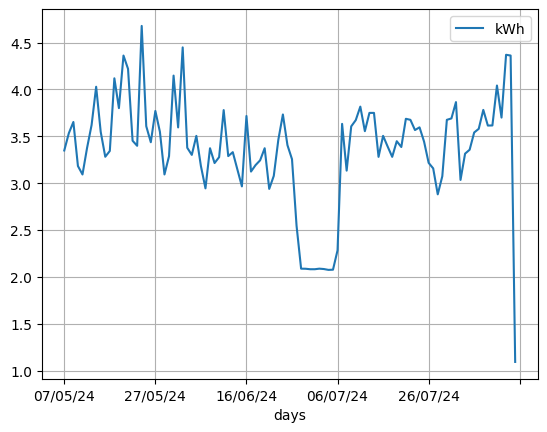

In [1167]:
df_grp.tail(100).plot()
plt.grid()

In [1168]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.537933
std,0.339600
min,2.881000
25%,3.325500
50%,3.554000
75%,3.684250
max,4.370000


In [1169]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

12/08/24 4.37
28/07/24 2.881


In [1170]:
day

'14/08/24'

In [1171]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1312721,23653,0.15,23.653,152.200567,30948417924,2024-08-14 00:00:22.237258,14/08/24,0:0:22
1312722,22053,0.16,22.053,163.243096,30948439977,2024-08-14 00:00:44.290258,14/08/24,0:0:44
1312723,22129,0.16,22.129,162.682453,30948462106,2024-08-14 00:01:06.419258,14/08/24,0:1:6
1312724,22533,0.16,22.533,159.765677,30948484639,2024-08-14 00:01:28.952258,14/08/24,0:1:28
1312725,23313,0.15,23.313,154.420281,30948507952,2024-08-14 00:01:52.265258,14/08/24,0:1:52
...,...,...,...,...,...,...,...,...
1313809,31952,0.11,31.952,112.669004,30978661217,2024-08-14 08:24:25.530258,14/08/24,8:24:25
1313810,24087,0.15,24.087,149.458214,30978685304,2024-08-14 08:24:49.617258,14/08/24,8:24:49
1313811,24323,0.15,24.323,148.008058,30978709627,2024-08-14 08:25:13.940258,14/08/24,8:25:13
1313812,24180,0.15,24.180,148.883375,30978733807,2024-08-14 08:25:38.120258,14/08/24,8:25:38


In [1172]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1312721 to 1313813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1093 non-null   int64         
 1   kWh        1093 non-null   float64       
 2   sec        1093 non-null   float64       
 3   Wh         1093 non-null   float64       
 4   cumul(ms)  1093 non-null   int64         
 5   dates      1093 non-null   datetime64[ns]
 6   days       1093 non-null   object        
 7   heure      1093 non-null   object        
 8   hours      1093 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 85.4+ KB


In [1173]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1312721    00  0.15
  1312722    00  0.16
  1312723    00  0.16
  1312724    00  0.16
  1312725    00  0.15
  ...       ...   ...
  1312863    00  0.11
  1312864    00  0.11
  1312865    00  0.11
  1312866    00  0.11
  1312867    00  0.11
  
  [147 rows x 2 columns]),
 ('01',
          hours   kWh
  1312868    01  0.11
  1312869    01  0.11
  1312870    01  0.11
  1312871    01  0.11
  1312872    01  0.11
  ...       ...   ...
  1312986    01  0.11
  1312987    01  0.11
  1312988    01  0.11
  1312989    01  0.11
  1312990    01  0.11
  
  [123 rows x 2 columns]),
 ('02',
          hours   kWh
  1312991    02  0.11
  1312992    02  0.11
  1312993    02  0.11
  1312994    02  0.11
  1312995    02  0.12
  ...       ...   ...
  1313111    02  0.19
  1313112    02  0.19
  1313113    02  0.19
  1313114    02  0.19
  1313115    02  0.19
  
  [125 rows x 2 columns]),
 ('03',
          hours   kWh
  1313116    03  0.19
  1313117    03  0.19
  1313118    03  0.1

In [1174]:
groupedbyhour.count()

,kWh
hours,
00,147
01,123
02,125
03,129
04,126
05,119
06,118
07,116
08,90


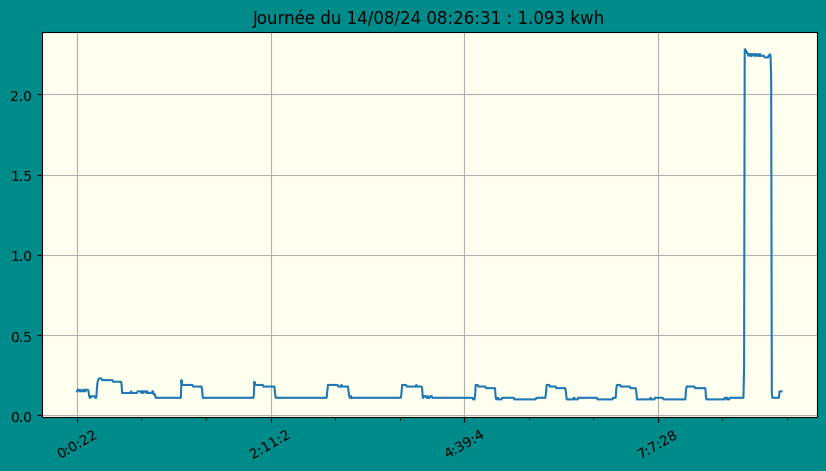

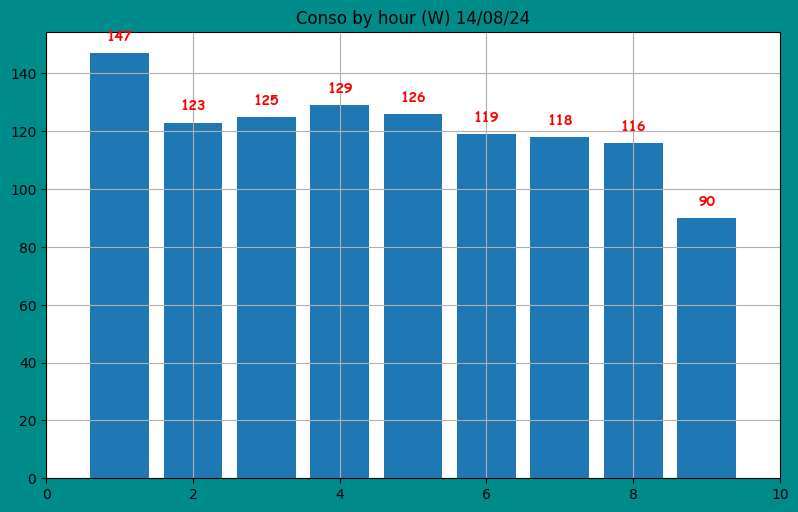

In [1175]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1176]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [1177]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1178]:
#conso_byhour(day)

In [1179]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

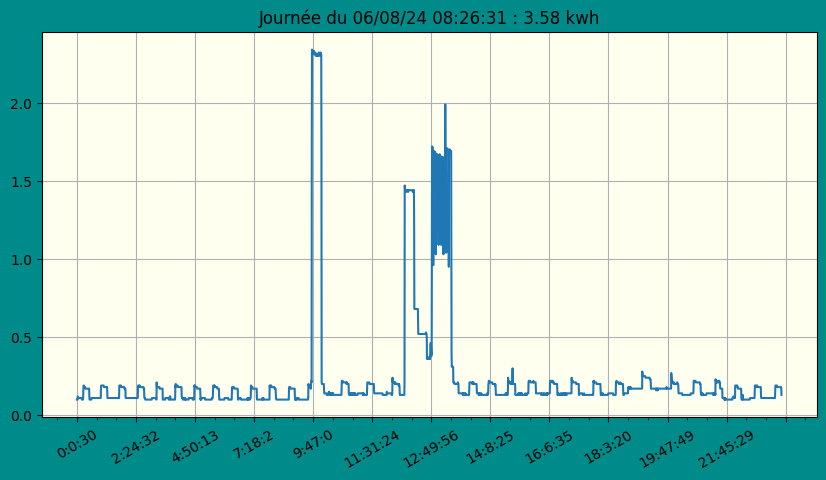

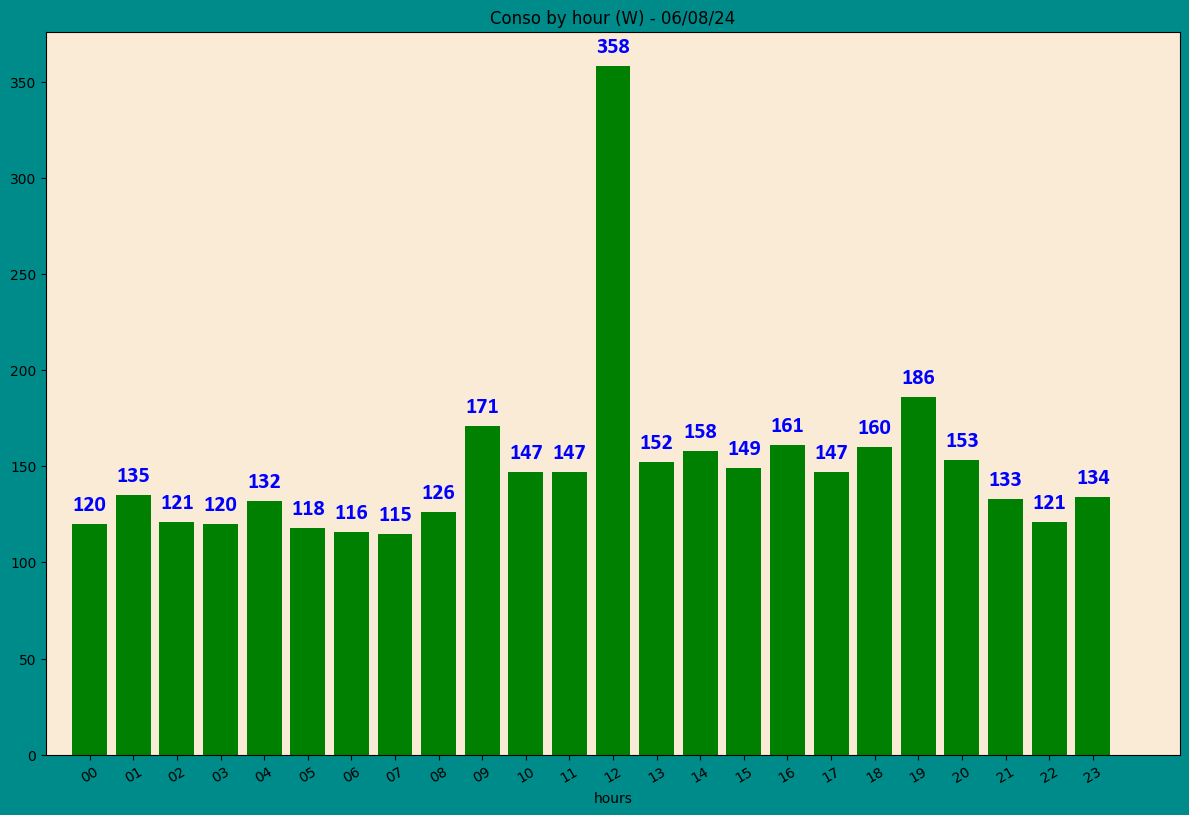

In [1180]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1181]:
month

days
15/07/24    3.281
16/07/24    3.505
17/07/24    3.391
18/07/24    3.281
19/07/24    3.448
20/07/24    3.386
21/07/24    3.687
22/07/24    3.676
23/07/24    3.567
24/07/24    3.596
25/07/24    3.443
26/07/24    3.217
27/07/24    3.158
28/07/24    2.881
29/07/24    3.074
30/07/24    3.676
31/07/24    3.691
01/08/24    3.865
02/08/24    3.035
03/08/24    3.315
04/08/24    3.357
05/08/24    3.541
06/08/24    3.580
07/08/24    3.782
08/08/24    3.615
09/08/24    3.616
10/08/24    4.042
11/08/24    3.700
12/08/24    4.370
13/08/24    4.362
Name: kWh, dtype: float64

In [1182]:
month.idxmax()

'12/08/24'

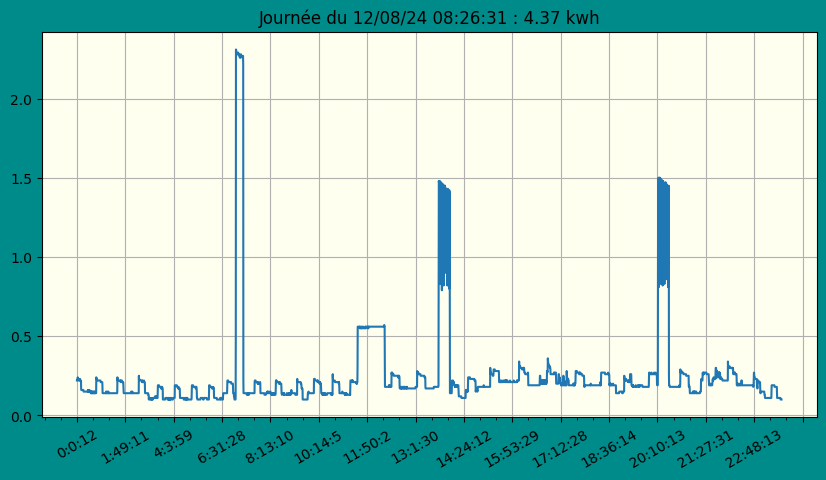

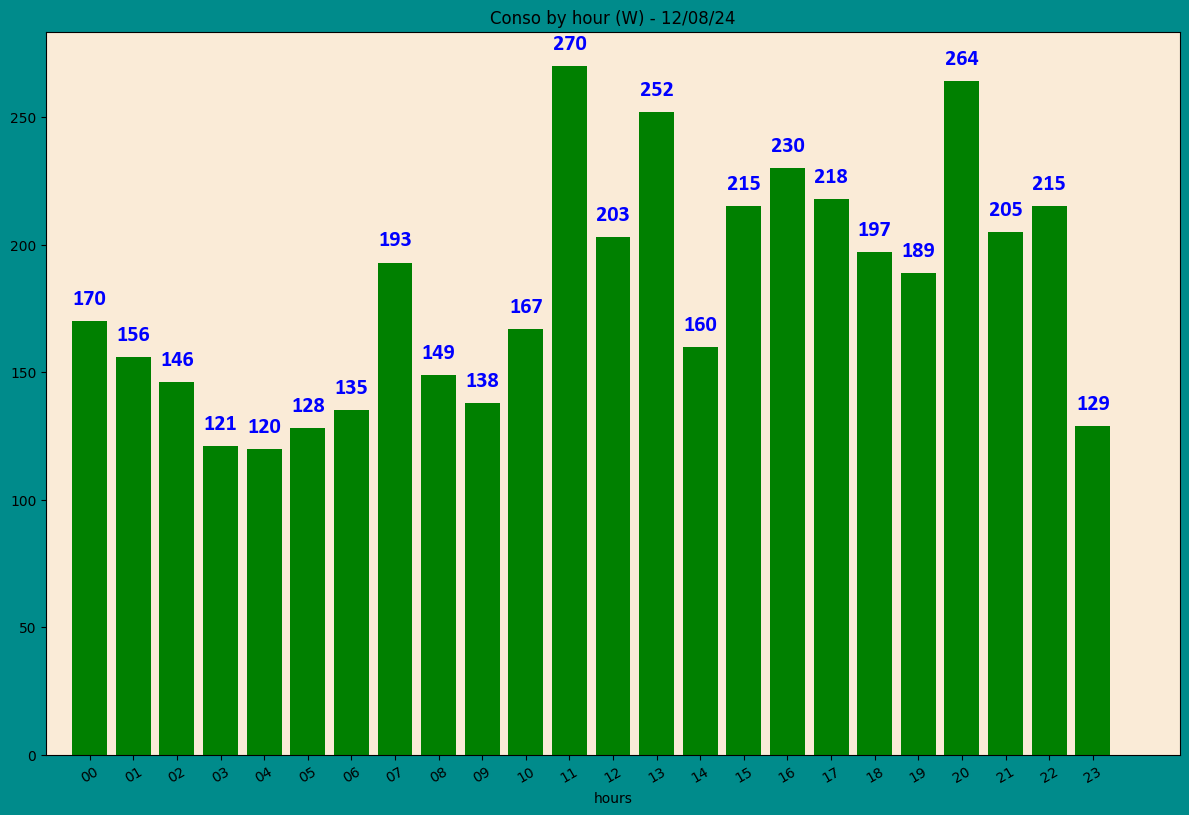

In [1183]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1184]:
filename='conso_data.csv'
#conso_data.to_csv(filename)